In [86]:
# Packages and Libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from textblob import TextBlob
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,LSTM,Embedding,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import label_binarize
# original data or original train data or class imbalanced data which I mentioned in this document indicates the train dataset
# over sampled data or class balanced data which I mentioned in this document indicates the over sampled data 
# original test data which I mentioned in this document indicates the test dataset

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Week 1 Task
# Reading and displaying the training dataset
df1=pd.read_csv(r"C:\Users\Gowsik\Downloads\Project 1-Ecommerce-Datasets\Ecommerce\train_data.csv")
df1

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive
...,...,...,...,...,...,...,...,...
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,Positive
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,Positive
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",Positive
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,Positive


In [4]:
# Reading and displaying the test dataset
df100=pd.read_csv(r"C:\Users\Gowsik\Downloads\Project 1-Ecommerce-Datasets\Ecommerce\test_data.csv")
df101=df100.rename(columns={'reviews.text':'text'})
df101

,name,brand,categories,primaryCategories,reviews.date,text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!
...,...,...,...,...,...,...,...
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-12-07T18:06:07.000Z,We love Alexa! Love being able to watch news b...,Awesome
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-23T00:00:00.000Z,Speaker is pretty loud and I love that I can t...,Good Bluetooth device
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,2017-01-18T00:00:00.000Z,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-12T00:00:00.000Z,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.


In [5]:
# performing EDA on train data
df1.shape

(4000, 8)

In [6]:
df1.size

32000

In [7]:
df1.describe

<bound method NDFrame.describe of                                                    name   brand  \
0     All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon   
1           Amazon - Echo Plus w/ Built-In Hub - Silver  Amazon   
2     Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
3     Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...  Amazon   
4     Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon   
...                                                 ...     ...   
3995        Amazon - Echo Plus w/ Built-In Hub - Silver  Amazon   
3996  Amazon Kindle E-Reader 6" Wifi (8th Generation...  Amazon   
3997  Amazon Tap - Alexa-Enabled Portable Bluetooth ...  Amazon   
3998  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon   
3999  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon   

                                             categories  \
0     Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1     Amazon Echo,Smart Home,Networking,Hom

In [8]:
df1.describe().T

,count,unique,top,freq
name,4000,23,Amazon Echo Show Alexa-enabled Bluetooth Speak...,676
brand,4000,1,Amazon,4000
categories,4000,23,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",628
primaryCategories,4000,4,Electronics,2600
reviews.date,4000,638,2017-01-23T00:00:00.000Z,99
reviews.text,4000,3598,Got this for my Daughter-in-Law and she loves ...,4
reviews.title,3990,2606,Great tablet,100
sentiment,4000,3,Positive,3749


In [9]:
df1.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date',
       'reviews.text', 'reviews.title', 'sentiment'],
      dtype='object')

In [10]:
df1.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [11]:
df1.tail()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,Positive
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,Positive
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",Positive
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,Positive
3999,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-30T00:00:00.000Z,"very satisfied with tablet, very fast and effi...",Gets the job done,Positive


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [13]:
# performing EDA on test data
df100.shape

(1000, 7)

In [14]:
df100.size

7000

In [15]:
df100.describe

<bound method NDFrame.describe of                                                   name   brand  \
0    Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...  Amazon   
1    Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
2    All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon   
3    Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon   
4    Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
..                                                 ...     ...   
995  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
996  Amazon Tap - Alexa-Enabled Portable Bluetooth ...  Amazon   
997  Fire HD 8 Tablet with Alexa, 8" HD Display, 32...  Amazon   
998  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon   
999  Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...  Amazon   

                                            categories     primaryCategories  \
0    Fire Tablets,Computers/Tablets & Networking,Ta...           Electronics   
1    Computer

In [16]:
df100.describe().T

,count,unique,top,freq
name,1000,23,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",169
brand,1000,1,Amazon,1000
categories,1000,23,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",169
primaryCategories,1000,4,Electronics,676
reviews.date,1000,366,2017-01-23T00:00:00.000Z,26
reviews.text,1000,979,Bought 2 of these for my 6 and 8 yr old and it...,2
reviews.title,997,796,Great tablet,22


In [17]:
df100.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date',
       'reviews.text', 'reviews.title'],
      dtype='object')

In [18]:
df100.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [19]:
df100.tail()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-12-07T18:06:07.000Z,We love Alexa! Love being able to watch news b...,Awesome
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-23T00:00:00.000Z,Speaker is pretty loud and I love that I can t...,Good Bluetooth device
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,2017-01-18T00:00:00.000Z,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-12T00:00:00.000Z,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.
999,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2017-06-17T00:00:00.000Z,I purchased this as a gift for my mother. Her ...,Great gift


In [20]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [21]:
df2=df1.sentiment
df2

0       Positive
1       Positive
2        Neutral
3       Positive
4       Positive
          ...   
3995    Positive
3996    Positive
3997    Positive
3998    Positive
3999    Positive
Name: sentiment, Length: 4000, dtype: object

In [22]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
result=lb.fit_transform(df2)
result

array([2, 2, 1, ..., 2, 2, 2])

In [23]:
df3=pd.DataFrame(result)
df3


,0
0,2
1,2
2,1
3,2
4,2
...,...
3995,2
3996,2
3997,2
3998,2


In [24]:
# concatenating two dataframe df1 and df3 after label encooding
df4=pd.concat([df1,df3],axis=1)
df5=df4.drop(['sentiment'],axis=1)
df5

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,0
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,2
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,2
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,1
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,2
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,2
...,...,...,...,...,...,...,...,...
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,2
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,2
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",2
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,2


In [25]:
# df6 dataset is displayed after carrying out certain process before
df6=df5.rename(columns={0:'sentiment','reviews.text':'text'})
df6

,name,brand,categories,primaryCategories,reviews.date,text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,2
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,2
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,1
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,2
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,2
...,...,...,...,...,...,...,...,...
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,2
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,2
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",2
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,2


In [26]:
# separating neutral,positive and negative reviews
negative=df6[df6.sentiment==0].text
neutral=df6[df6.sentiment==1].text
positive=df6[df6.sentiment==2].text




In [27]:
# joining the reviews
word_negative=''.join(negative)
word_neutral=''.join(neutral)
word_positive=''.join(positive)

In [28]:
# stopwords
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [29]:
# wordcloud
from wordcloud import WordCloud
word=WordCloud(width = 800, height = 800,
                background_color ='red',stopwords=stopwords,
                min_font_size = 10).generate(word_positive)

In [30]:
word1=WordCloud(width = 800, height = 800,
                background_color ='cyan',stopwords=stopwords,
                min_font_size = 10).generate(word_negative)
word2=WordCloud(width = 800, height = 800,
                background_color ='white',stopwords=stopwords,
                min_font_size = 10).generate(word_neutral)

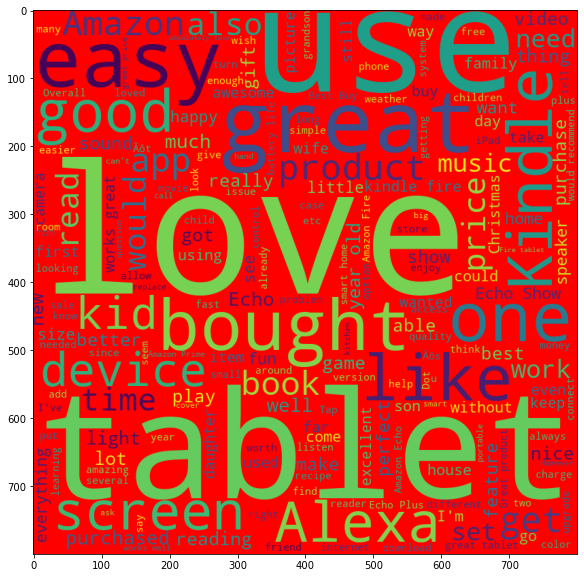

In [31]:
# red - positive
# cyan - negative
# white - neutral
plt.figure(figsize=(20,10))
plt.imshow(word)


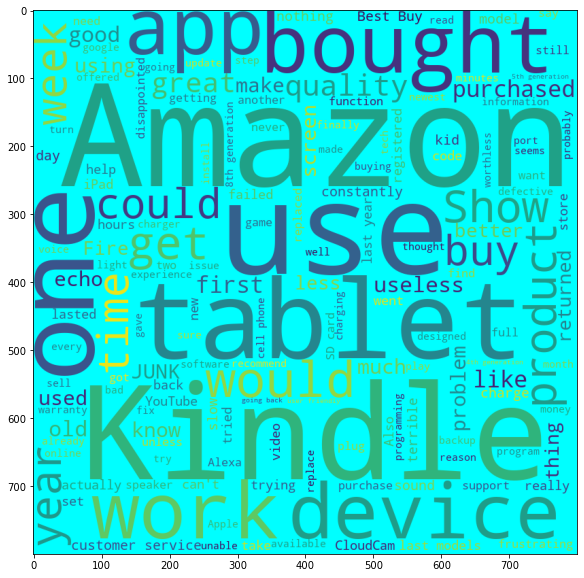

In [32]:
plt.figure(figsize=(20,10))
plt.imshow(word1)


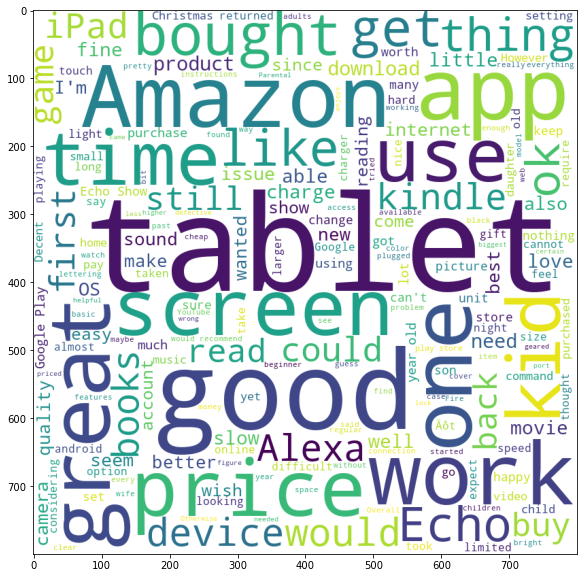

In [33]:
plt.figure(figsize=(20,10))
plt.imshow(word2)


In [34]:
# value_count of sentiment
# the count value indicates that it is a class imbalance problem
df1.value_counts('sentiment')

sentiment
Positive    3749
Neutral      158
Negative      93
dtype: int64

<AxesSubplot:xlabel='sentiment'>

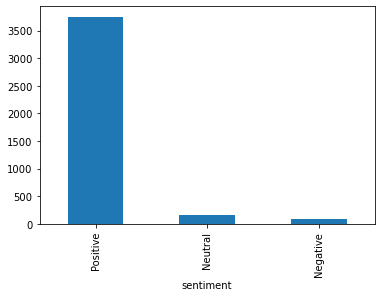

In [35]:
df1.value_counts('sentiment').plot(kind='bar')

In [36]:
words=df6.text
words

0       Purchased on Black FridayPros - Great Price (e...
1       I purchased two Amazon in Echo Plus and two do...
2       Just an average Alexa option. Does show a few ...
3       very good product. Exactly what I wanted, and ...
4       This is the 3rd one I've purchased. I've bough...
                              ...                        
3995    It‚Äôs fun for the family to play with, but it...
3996    I love the Kindle, it is a great product. It r...
3997    I was looking for a blutooth speaker to use wi...
3998    This is the second Amazon Fire 7 tablet I have...
3999    very satisfied with tablet, very fast and effi...
Name: text, Length: 4000, dtype: object

In [37]:
# Normalization(casing)
words_lower=[i.lower() for i in words]
words_lower[1]

'i purchased two amazon in echo plus and two dots plus four fire sticks and the hub philips hue for lamp for the family at christmas 2017. i‚äôm so happy with these purchases and learning so much with alexa. you can start your daily routine with alexa and program it to whatever you would like to include news weather music horoscope also you can start your day off with a compliment and i think is very important. alexa gave me the best chili recipe i mean the best it‚äôs called chili i. i want my husband to use alexa to stay organized for business dates and reminders. this is the way to go'

In [38]:
# Tokenization
from nltk.tokenize import word_tokenize,sent_tokenize
tokenized_words=[]
for i in words_lower:
    word_tokenized=word_tokenize(i)
    tokenized_words.append(word_tokenized)
tokenized_words[1]

['i',
 'purchased',
 'two',
 'amazon',
 'in',
 'echo',
 'plus',
 'and',
 'two',
 'dots',
 'plus',
 'four',
 'fire',
 'sticks',
 'and',
 'the',
 'hub',
 'philips',
 'hue',
 'for',
 'lamp',
 'for',
 'the',
 'family',
 'at',
 'christmas',
 '2017.',
 'i‚äôm',
 'so',
 'happy',
 'with',
 'these',
 'purchases',
 'and',
 'learning',
 'so',
 'much',
 'with',
 'alexa',
 '.',
 'you',
 'can',
 'start',
 'your',
 'daily',
 'routine',
 'with',
 'alexa',
 'and',
 'program',
 'it',
 'to',
 'whatever',
 'you',
 'would',
 'like',
 'to',
 'include',
 'news',
 'weather',
 'music',
 'horoscope',
 'also',
 'you',
 'can',
 'start',
 'your',
 'day',
 'off',
 'with',
 'a',
 'compliment',
 'and',
 'i',
 'think',
 'is',
 'very',
 'important',
 '.',
 'alexa',
 'gave',
 'me',
 'the',
 'best',
 'chili',
 'recipe',
 'i',
 'mean',
 'the',
 'best',
 'it‚äôs',
 'called',
 'chili',
 'i.',
 'i',
 'want',
 'my',
 'husband',
 'to',
 'use',
 'alexa',
 'to',
 'stay',
 'organized',
 'for',
 'business',
 'dates',
 'and',
 'rem

In [39]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemma= WordNetLemmatizer()
lem=[]
for i in tokenized_words:
    lem.append([lemma.lemmatize(j) for j in i])
lem[1]

['i',
 'purchased',
 'two',
 'amazon',
 'in',
 'echo',
 'plus',
 'and',
 'two',
 'dot',
 'plus',
 'four',
 'fire',
 'stick',
 'and',
 'the',
 'hub',
 'philip',
 'hue',
 'for',
 'lamp',
 'for',
 'the',
 'family',
 'at',
 'christmas',
 '2017.',
 'i‚äôm',
 'so',
 'happy',
 'with',
 'these',
 'purchase',
 'and',
 'learning',
 'so',
 'much',
 'with',
 'alexa',
 '.',
 'you',
 'can',
 'start',
 'your',
 'daily',
 'routine',
 'with',
 'alexa',
 'and',
 'program',
 'it',
 'to',
 'whatever',
 'you',
 'would',
 'like',
 'to',
 'include',
 'news',
 'weather',
 'music',
 'horoscope',
 'also',
 'you',
 'can',
 'start',
 'your',
 'day',
 'off',
 'with',
 'a',
 'compliment',
 'and',
 'i',
 'think',
 'is',
 'very',
 'important',
 '.',
 'alexa',
 'gave',
 'me',
 'the',
 'best',
 'chili',
 'recipe',
 'i',
 'mean',
 'the',
 'best',
 'it‚äôs',
 'called',
 'chili',
 'i.',
 'i',
 'want',
 'my',
 'husband',
 'to',
 'use',
 'alexa',
 'to',
 'stay',
 'organized',
 'for',
 'business',
 'date',
 'and',
 'reminder

In [40]:
# removing Stopwords and punctuations
from string import punctuation
stopwords1= list(punctuation)+['..']+['...']+['....']+['.....']+['......']
cleaned=[]
for i in lem:
    cleaned.append([word for word in i if word not in stopwords and stopwords1])
cleaned[1]


['purchased',
 'two',
 'amazon',
 'echo',
 'plus',
 'two',
 'dot',
 'plus',
 'four',
 'fire',
 'stick',
 'hub',
 'philip',
 'hue',
 'lamp',
 'family',
 'christmas',
 '2017.',
 'i‚äôm',
 'happy',
 'purchase',
 'learning',
 'much',
 'alexa',
 '.',
 'start',
 'daily',
 'routine',
 'alexa',
 'program',
 'whatever',
 'would',
 'like',
 'include',
 'news',
 'weather',
 'music',
 'horoscope',
 'also',
 'start',
 'day',
 'compliment',
 'think',
 'important',
 '.',
 'alexa',
 'gave',
 'best',
 'chili',
 'recipe',
 'mean',
 'best',
 'it‚äôs',
 'called',
 'chili',
 'i.',
 'want',
 'husband',
 'use',
 'alexa',
 'stay',
 'organized',
 'business',
 'date',
 'reminder',
 '.',
 'way',
 'go']

In [41]:
cleaned1=[]
for i in cleaned:
    cleaned2=' '.join(i)
    cleaned1.append(cleaned2)
cleaned1[1]
    

'purchased two amazon echo plus two dot plus four fire stick hub philip hue lamp family christmas 2017. i‚äôm happy purchase learning much alexa . start daily routine alexa program whatever would like include news weather music horoscope also start day compliment think important . alexa gave best chili recipe mean best it‚äôs called chili i. want husband use alexa stay organized business date reminder . way go'

In [42]:
# TFIDF
tfidf=TfidfVectorizer()

In [43]:
tfidf.fit(cleaned1)

TfidfVectorizer()

In [44]:
features=tfidf.get_feature_names()
features[200]


'afternoon'

In [45]:
tfidf.vocabulary_

{'purchased': 3011,
 'black': 525,
 'fridaypros': 1638,
 'great': 1765,
 'price': 2931,
 'even': 1388,
 'sale': 3297,
 'powerful': 2892,
 'fast': 1502,
 'quad': 3025,
 'core': 944,
 'processor': 2959,
 'amazing': 264,
 'soundwell': 3575,
 'builtcons': 624,
 'amazon': 266,
 'ad': 156,
 'need': 2540,
 'subsidize': 3716,
 'tablet': 3799,
 'remove': 3179,
 'add': 162,
 'pay': 2750,
 '15': 18,
 'inability': 1988,
 'access': 125,
 'apps': 332,
 'except': 1412,
 'one': 2644,
 'way': 4228,
 'wa': 4190,
 'able': 115,
 'accomplish': 136,
 'google': 1734,
 'play': 2832,
 'storenet': 3674,
 'money': 2483,
 'two': 4036,
 'echo': 1280,
 'plus': 2851,
 'dot': 1208,
 'four': 1624,
 'fire': 1555,
 'stick': 3661,
 'hub': 1925,
 'philip': 2790,
 'hue': 1927,
 'lamp': 2190,
 'family': 1492,
 'christmas': 749,
 '2017': 39,
 'äôm': 4386,
 'happy': 1814,
 'purchase': 3010,
 'learning': 2226,
 'much': 2505,
 'alexa': 227,
 'start': 3636,
 'daily': 1018,
 'routine': 3274,
 'program': 2967,
 'whatever': 4258,
 

In [46]:
tfidf_dtm =tfidf.transform(cleaned1)
tfidf_dtm

<4000x4401 sparse matrix of type '<class 'numpy.float64'>'
	with 57217 stored elements in Compressed Sparse Row format>

In [47]:
df7=tfidf_dtm.toarray()
df7

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
# splitting x and y
x=df7
y=df6.sentiment

In [80]:
# train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [81]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
result=mb.fit(x_train,y_train)
result1=mb.predict(x_test)
result1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [82]:
df8=pd.DataFrame(result1)
df9=df8.rename(columns={0:'sentiment'})
df9

,sentiment
0,2
1,2
2,2
3,2
4,2
...,...
995,2
996,2
997,2
998,2


In [83]:
df9.value_counts('sentiment')
# This clearly shows that the dataset is imbalanced

sentiment
2    1000
dtype: int64

In [53]:
x100=df101.text
x100

0      Amazon kindle fire has a lot of free app and c...
1      The Echo Show is a great addition to the Amazo...
2      Great value from Best Buy. Bought at Christmas...
3      I use mine for email, Facebook ,games and to g...
4      This is a fantastic item & the person I bought...
                             ...                        
995    We love Alexa! Love being able to watch news b...
996    Speaker is pretty loud and I love that I can t...
997    Bought 2 of these for my 6 and 8 yr old and it...
998    Was told by sales person I could come back in ...
999    I purchased this as a gift for my mother. Her ...
Name: text, Length: 1000, dtype: object

In [94]:
Rtestdata_dtm=tfidf.transform(x100)
Rtestdata_dtm=Rtestdata_dtm.toarray()
Rtestdata_dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
# Week 2 Task
# The class imbalanced dataset is converted to class balanced dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_sm,y_sm=smt.fit_resample(x,y)
df10=pd.DataFrame(y_sm)
df10.value_counts('sentiment')

sentiment
2    3749
1    3749
0    3749
dtype: int64

In [97]:
# train and test split for class balanced data
x1_train,x1_test,y1_train,y1_test=train_test_split(x_sm,y_sm,test_size=0.25,random_state=1)

In [58]:
# XGBClassifier(class balanced data)
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x1_train,y1_train)
predicted1=xg.predict(x1_test)
print(predicted1)

[10:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[2 0 2 ... 0 0 0]


In [59]:
# classification report and f1score for xgb classifier
from sklearn.metrics import classification_report,f1_score,accuracy_score
fscore=f1_score(y1_test,predicted1,average=None)
cr=classification_report(y1_test,predicted1)
accuracy=accuracy_score(y1_test,predicted1)
print(cr)
print(fscore)
print(accuracy)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       941
           1       0.98      0.99      0.98       896
           2       0.98      0.97      0.98       975

    accuracy                           0.98      2812
   macro avg       0.98      0.98      0.98      2812
weighted avg       0.98      0.98      0.98      2812

[0.9936238  0.98222222 0.97734295]
0.984352773826458


In [113]:
# random forest classifier(class balanced data)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x1_train,y1_train)
predicted2=rf.predict(x1_test)
predicted2

array([0, 0, 2, ..., 0, 0, 0])

In [114]:
# calssification report and f1-score for random forest
cr=classification_report(y1_test,predicted2)
fscore=f1_score(y1_test,predicted2,average=None)
accuracy=accuracy_score(y1_test,predicted2)
print(cr)
print(fscore)
print(accuracy)
# random forest classifier performs better than XGBClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       941
           1       1.00      0.99      1.00       896
           2       0.99      1.00      0.99       975

    accuracy                           1.00      2812
   macro avg       1.00      1.00      1.00      2812
weighted avg       1.00      1.00      1.00      2812

[0.99840341 0.99552573 0.99437915]
0.9960881934566145


In [98]:
# Week 3 Task
# multi class SVM (class balanced or over sampled data)
from sklearn import svm
sv=svm.SVC().fit(x1_train,y1_train)
train_output=sv.predict(x1_train)
output=sv.predict(x1_test)
output


array([0, 0, 2, ..., 0, 0, 0])

In [99]:
# calssification report and f1-score for multi class SVM
cr=classification_report(y1_test,output)
fscore=f1_score(y1_test,output,average=None)
accuracy=accuracy_score(y1_test,output)
training_accuracy=accuracy_score(y1_train,train_output)
print(cr)
print(fscore)
print(accuracy)
print(training_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       941
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       975

    accuracy                           1.00      2812
   macro avg       1.00      1.00      1.00      2812
weighted avg       1.00      1.00      1.00      2812

[1. 1. 1.]
1.0
1.0


In [64]:
# Multi Layer Perceptron Classifier (class balanced or over sampled data)
from sklearn.neural_network import MLPClassifier
perceptron = MLPClassifier(hidden_layer_sizes=(8,4),
                        max_iter = 100,activation = 'relu',
                        solver = 'adam')

In [65]:
perceptron.fit(x1_train,y1_train)

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=100)

In [66]:
train_output1=perceptron.predict(x1_train)
output1=perceptron.predict(x1_test)
output1

array([0, 0, 2, ..., 0, 0, 0])

In [67]:
# calssification report and f1-score for perceptron classification
cr=classification_report(y1_test,output1)
fscore=f1_score(y1_test,output1,average=None)
accuracy=accuracy_score(y1_test,output1)
training_accuracy=accuracy_score(y1_train,train_output1)
print(cr)
print(fscore)
print(accuracy)
print(training_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       941
           1       0.97      1.00      0.99       896
           2       1.00      0.97      0.99       975

    accuracy                           0.99      2812
   macro avg       0.99      0.99      0.99      2812
weighted avg       0.99      0.99      0.99      2812

[0.99893843 0.98569857 0.98543184]
0.9900426742532006
1.0


In [68]:
# ensemble technique using Voting Classifier: XGboost + oversampled_multinomial_NB (class balanced or over sampled data)
# The accuracy score and F1- score of the ensemble technique is very much similiar to the previous individual models and the individual models infact provided better accuracy score and F1-score than ensemble technique
from sklearn.ensemble import VotingClassifier
model2 = MultinomialNB()
model1 =  XGBClassifier()
model = VotingClassifier(estimators=[('xgb', model1), ('nb', model2)])
model.fit(x1_train,y1_train)
y_pred = model.predict(x1_test)
print(classification_report(y1_test,y_pred))
print(accuracy_score(y1_test, y_pred))

[10:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.89      0.99      0.94       896
           2       1.00      0.85      0.92       975

    accuracy                           0.95      2812
   macro avg       0.95      0.95      0.95      2812
weighted avg       0.95      0.95      0.95      2812

0.9459459459459459


In [69]:
# sentiment score as a feature (introducing subjectivity and polarity in the original train dataset)- sentimentscore=subjectivity + polarity
from textblob import TextBlob

def subjectivity(x):
    return TextBlob(x).subjectivity 
def polarity(x):
    return TextBlob(x).polarity+1
 
df6['Subjectivity'] = df6['text'].apply(subjectivity)
df6['Polarity']=df6['text'].apply(polarity)







In [70]:
x2=df6[['Polarity','Subjectivity']]
y2=df6.sentiment

In [71]:
# train and test split after performing textblob
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.25,random_state=1)

In [72]:
# Multi-class SVM (polarity and subjectivity from original train data)
from sklearn import svm
svt=svm.SVC().fit(x2_train,y2_train)
train_output1=svt.predict(x2_train)
output1=svt.predict(x2_test)
output1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [73]:
# calssification report and f1-score for multi class SVM (using Polarity and Subjectivity)
cr=classification_report(y2_test,output1)
fscore=f1_score(y2_test,output1,average=None)
accuracy=accuracy_score(y2_test,output1)
training_accuracy=accuracy_score(y2_train,train_output1)
print(cr)
print(fscore)
print(accuracy)
print(training_accuracy)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        44
           2       0.93      1.00      0.97       934

    accuracy                           0.93      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.87      0.93      0.90      1000

[0.         0.         0.96587384]
0.934
0.9383333333333334


In [74]:
# original train dataset
from sklearn import svm
svt2=svm.SVC().fit(x_train,y_train)
train_output2=svt2.predict(x_train)
output2=svt2.predict(x_test)
output2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [75]:
# calssification report and f1-score for multi class SVM (original dataset)

cr=classification_report(y_test,output2)
fscore=f1_score(y_test,output2,average=None)
accuracy=accuracy_score(y_test,output2)
training_accuracy=accuracy_score(y_train,train_output2)
print(cr)
print(fscore)
print(accuracy)
print(training_accuracy)






# Using sentiment score as a feature I couldn't see much difference in the accuracy or F1-score (SVM)


              precision    recall  f1-score   support

           0       1.00      0.14      0.24        22
           1       1.00      0.05      0.09        44
           2       0.94      1.00      0.97       934

    accuracy                           0.94      1000
   macro avg       0.98      0.39      0.43      1000
weighted avg       0.94      0.94      0.91      1000

[0.24       0.08695652 0.9683774 ]
0.939
0.955


In [65]:
# Week 4 Task
# Long short term Memory (LSTM) for original or imbalanced dataset
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,LSTM,Embedding,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,accuracy_score


In [59]:
from sklearn.preprocessing import label_binarize
y3_train = label_binarize(y_train, classes=[0, 1, 2])
print(y_train.shape)
print(y3_train.shape)

(3000,)
(3000, 3)


In [78]:
x_train.shape

(3000, 4401)

In [79]:
y_train.shape

(3000,)

In [80]:
# Model Building
epochs = 4
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(100, emb_dim, input_length=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train, y3_train, epochs=epochs, batch_size=batch_size)


Epoch 1/4
12/12 [==============================] - 870s 74s/step - loss: 0.9617 - acc: 0.7122
Epoch 2/4
12/12 [==============================] - 940s 79s/step - loss: 0.2978 - acc: 0.9367
Epoch 3/4
12/12 [==============================] - 964s 80s/step - loss: 0.2742 - acc: 0.9402
Epoch 4/4
12/12 [==============================] - 993s 83s/step - loss: 0.2656 - acc: 0.9418


In [92]:
# Classification Report and Accuracy_score for imbalanced class data using LSTM
prediction=model.predict(x_test)
y_pred = np.argmax(prediction, axis=1)
classification=classification_report(y_test,y_pred)
print(classification)
testing_accuracy=accuracy_score(y_test,y_pred)
testing_accuracy


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        44
           2       0.93      1.00      0.97       934

    accuracy                           0.93      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.87      0.93      0.90      1000



0.934

In [74]:
# Model Building for original dataset using GRU
epochs = 4
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(100, emb_dim, input_length=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train, y3_train, epochs=epochs, batch_size=batch_size)


Epoch 1/4
12/12 [==============================] - 2583s 215s/step - loss: 0.9271 - acc: 0.8721
Epoch 2/4
12/12 [==============================] - 2600s 216s/step - loss: 0.3692 - acc: 0.9393
Epoch 3/4
12/12 [==============================] - 2454s 205s/step - loss: 0.3052 - acc: 0.9380
Epoch 4/4
12/12 [==============================] - 2464s 205s/step - loss: 0.2667 - acc: 0.9406


In [75]:
# Classification Report and Accuracy_score for imbalanced class data using GRU
prediction0=model.predict(x_test)
y_pred = np.argmax(prediction0, axis=1)
classification=classification_report(y_test,y_pred)
print(classification)
testing_accuracy=accuracy_score(y_test,y_pred)
testing_accuracy

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        44
           2       0.93      1.00      0.97       934

    accuracy                           0.93      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.87      0.93      0.90      1000



0.934

In [60]:
y4_train=label_binarize(y1_train,classes=[0,1,2])
y4_train.shape

(8435, 3)

In [95]:
x1_train.shape

(8435, 4401)

In [76]:
# Model Building for over sampled data using LSTM
epochs = 3
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(x1_train.shape[1], emb_dim, input_length=x1_train.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x1_train, y4_train, epochs=epochs, batch_size=batch_size)


Epoch 1/3
33/33 [==============================] - 6544s 198s/step - loss: 1.0991 - acc: 0.3407
Epoch 2/3
33/33 [==============================] - 6717s 204s/step - loss: 1.0991 - acc: 0.3389
Epoch 3/3
33/33 [==============================] - 6873s 208s/step - loss: 1.0988 - acc: 0.3439


In [77]:
# Classification report and Accuracy score for over sampled data using LSTM
prediction1=model.predict(x1_test)
y_pred = np.argmax(prediction1, axis=1)
classification=classification_report(y1_test,y_pred)
print(classification)
testing_accuracy=accuracy_score(y1_test,y_pred)
testing_accuracy


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       941
           1       0.00      0.00      0.00       896
           2       0.35      1.00      0.51       975

    accuracy                           0.35      2812
   macro avg       0.12      0.33      0.17      2812
weighted avg       0.12      0.35      0.18      2812



0.34672830725462306

In [71]:
# Model building for over sampled data using GRU
epochs = 3
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(x1_train.shape[1], emb_dim, input_length=x1_train.shape[1]))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x1_train, y4_train, epochs=epochs, batch_size=batch_size)


Epoch 1/3
33/33 [==============================] - 6927s 210s/step - loss: 1.0999 - acc: 0.3322
Epoch 2/3
33/33 [==============================] - 7158s 217s/step - loss: 1.0990 - acc: 0.3415
Epoch 3/3
33/33 [==============================] - 7474s 227s/step - loss: 1.0994 - acc: 0.3409


In [72]:
# Classification report and Accuracy score for over sampled data using GRU
prediction2=model.predict(x1_test)
y_pred = np.argmax(prediction2, axis=1)
classification=classification_report(y1_test,y_pred)
print(classification)
testing_accuracy=accuracy_score(y1_test,y_pred)
testing_accuracy



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       941
           1       0.00      0.00      0.00       896
           2       0.35      1.00      0.51       975

    accuracy                           0.35      2812
   macro avg       0.12      0.33      0.17      2812
weighted avg       0.12      0.35      0.18      2812



0.34672830725462306

In [91]:
# Traditional ML algorithms for original or class imbalanced dataset- 1) Random forest and 2) SVM
R_forest=RandomForestClassifier()
R_forest.fit(x_train,y_train)
predicted20=R_forest.predict(x_test)
report=classification_report(y_test,predicted20)
accuracy=accuracy_score(y_test,predicted20)
print(accuracy)
print(report)


0.944
              precision    recall  f1-score   support

           0       1.00      0.23      0.37        22
           1       1.00      0.11      0.20        44
           2       0.94      1.00      0.97       934

    accuracy                           0.94      1000
   macro avg       0.98      0.45      0.52      1000
weighted avg       0.95      0.94      0.92      1000



In [92]:
from sklearn import svm
svt2=svm.SVC().fit(x_train,y_train)
train_output2=svt2.predict(x_train)
output2=svt2.predict(x_test)
cr=classification_report(y_test,output2)
fscore=f1_score(y_test,output2,average=None)
accuracy=accuracy_score(y_test,output2)
training_accuracy=accuracy_score(y_train,train_output2)
print(cr)
print(fscore)
print(accuracy)
print(training_accuracy)

              precision    recall  f1-score   support

           0       1.00      0.14      0.24        22
           1       1.00      0.05      0.09        44
           2       0.94      1.00      0.97       934

    accuracy                           0.94      1000
   macro avg       0.98      0.39      0.43      1000
weighted avg       0.94      0.94      0.91      1000

[0.24       0.08695652 0.9683774 ]
0.939
0.955


In [ ]:
# imbalanced or original train dataset
# The given train dataset is imbalanced
# Traditional Machine learning models are better in handling class imbalance problems than that of deep learning models like LSTM and GRU
# with respect to class imbalance problems the minority class is typically of the most interest
# deep learning models like LSTM and GRU are not efficient in predicting the minority classes which can be clearly seen above whereas ML algorithms are bit better in handling the class imbalance problems
# with respect to accuracy i couldnot see a huge difference between the Ml and Dl Models

In [ ]:
# using SMOTE I converted the Imbalanced data to balanced data (over sampling technique)
# then I trained and predicted the sentiment for the over sampled data using XGBoost, RandomForest, SVM, Multilayer perceptron and stacking (XGboost+MultinomialNB) Algorithmns
# Random Forest is most effective among the above mentioned algorithms
# Additionally tried the over sampled data with LSTM and GRU but only for a couple of epochs as it took a lot of time to compute

In [119]:
# Original Test Data output prediction using Random Forest classifier
final_test_result=rf.predict(Rtestdata_dtm)
final_test_result


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,